# Impact of Data Interpolation

<hr>

### Goal of Project 
- See how big impact interpolation can have on results
- See the impact on a simple model usage

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# read the data 
data = pd.read_parquet('./data/weather-predict.parquet')
data.head()

,Pressure,Pressure+24h
Datetime,,
2006-04-01 00:00:00,1015.13,1015.68
2006-04-01 01:00:00,1015.63,1015.41
2006-04-01 02:00:00,1015.94,1014.98
2006-04-01 03:00:00,1016.41,1015.18
2006-04-01 04:00:00,1016.51,1014.70


In [3]:
data.shape

(96418, 2)

In [4]:
data.dtypes

Pressure        float64
Pressure+24h    float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96418 entries, 2006-04-01 00:00:00 to 2016-09-09 23:00:00
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pressure      96418 non-null  float64
 1   Pressure+24h  96380 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB


In [37]:
data.corr()

,Pressure,Pressure+24h
Pressure,1.000000,0.419074
Pressure+24h,0.419074,1.000000


In [35]:
# missing values
data.isna().sum()

Pressure         0
Pressure+24h    38
dtype: int64

In [36]:
(data == 0).sum()

Pressure        1288
Pressure+24h    1288
dtype: int64

In [9]:
data_zero_val = data[data['Pressure+24h']==0]
data_zero_val.head()

,Pressure,Pressure+24h
Datetime,,
2006-08-13 18:00:00,1009.83,0.0
2006-08-14 10:00:00,1013.15,0.0
2006-08-16 12:00:00,1014.56,0.0
2006-08-17 09:00:00,1012.39,0.0
2006-08-21 18:00:00,1015.50,0.0


In [11]:
# percentage of datasets with zero values
(len(data_zero_val)/len(data))*100

1.3358501524611588

In [18]:
# drop data with na and zero value

dataset = data[data['Pressure+24h']!=0].dropna()

In [28]:
dataset.head()

,Pressure,Pressure+24h
Datetime,,
2006-04-01 00:00:00,1015.13,1015.68
2006-04-01 01:00:00,1015.63,1015.41
2006-04-01 02:00:00,1015.94,1014.98
2006-04-01 03:00:00,1016.41,1015.18
2006-04-01 04:00:00,1016.51,1014.70


In [21]:
len(dataset),len(data)

(95092, 96418)

In [22]:
# correlation
dataset.corr()

,Pressure,Pressure+24h
Pressure,1.000000,0.083047
Pressure+24h,0.083047,1.000000


In [38]:
dataset.replace(0,np.nan).interpolate().corr()

,Pressure,Pressure+24h
Pressure,1.00000,0.79447
Pressure+24h,0.79447,1.00000


<AxesSubplot:xlabel='Datetime'>

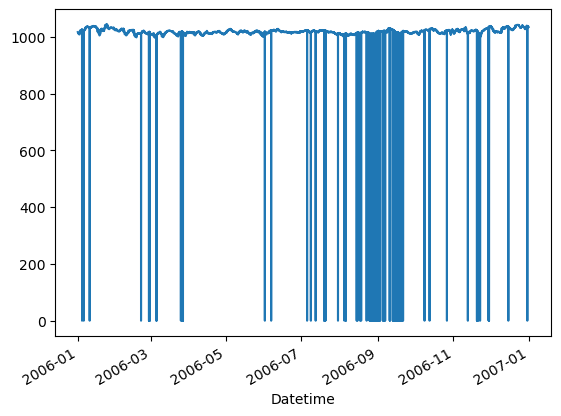

In [39]:
dataset['Pressure'].loc['2006'].plot()

<AxesSubplot:xlabel='Datetime'>

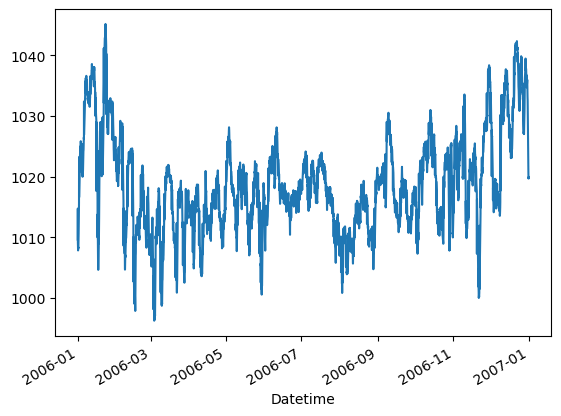

In [40]:
dataset['Pressure+24h'].loc['2006'].plot()

In [43]:
def regression_score(X,y):
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test,y_pred)

In [44]:
# Test baseline

regression_score(dataset[['Pressure']],dataset['Pressure+24h'])

0.008080860028906622

In [45]:
# Test on interpolated data
dataset_interpolated = dataset.replace(0,np.nan).interpolate()
regression_score(dataset_interpolated[['Pressure']],dataset_interpolated['Pressure+24h'])

0.6269601274081953